In [42]:
from sklearn.datasets import make_classification
from collections import Counter
import numpy as np
from matplotlib import pyplot

In [46]:
# generate randomly high imbalanced data
X,y = make_classification(n_samples= 10000 , n_classes = 2, n_features = 2, n_clusters_per_class=2, n_redundant =0 , weights=[0.99])

In [47]:
counter = Counter(y)

In [48]:
print(counter)

Counter({0: 9855, 1: 145})


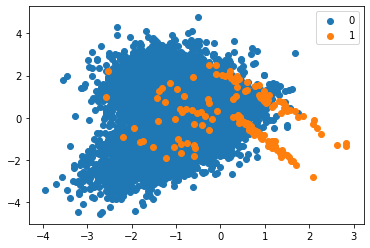

In [53]:
# visualize the class distribution
for label , _ in counter.items():
    inx = np.where( y==label)
    pyplot.scatter(X[inx,0],X[inx,1] , label = str(label))
pyplot.legend()
pyplot.show()

In [55]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

In [57]:
# train model with 10 fold , 3 repeats of XGBoost classifier , no parameter tuning
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits= 10, n_repeats = 3 )
score = cross_val_score(model, X, y , cv=cv, scoring = 'roc_auc')

In [61]:
# the base line auc
print('mean of auc = %.5f' % np.mean(score))

mean of auc = 0.83305


In [66]:
# XGBoost has scale weight to set it up for imbalance data faster convergence 
estimate  = (counter[0] / counter[1])
print (estimate )

67.96551724137932


In [77]:
model_imb = XGBClassifier(scale_pos_weight = 99) 

In [78]:
score_imb = cross_val_score(model_imb , X, y , scoring = 'roc_auc' , cv =cv)

In [79]:
# get the aur score for imbalance XGBoost classifier
print('mean of auc of imblance XGBoost %.5f' % np.mean(score_imb))

mean of auc of imblance XGBoost 0.82850


# we can leverage grid search for checkign various weight class

In [85]:
from sklearn.model_selection import GridSearchCV

In [81]:
weights = [1, 10 , 20 , 25, 50 , 75, 99, 100, 1000]
param_grid = dict(scale_pos_wieght = weights)

In [83]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats =3)

In [87]:
# run grid search
grid = GridSearchCV(estimator = model_imb , param_grid = param_grid, cv =cv)

In [88]:
result = grid.fit(X,y)

In [92]:
print("best %f with %s "% (result.best_score_ , result.best_params_))

best 0.941933 with {'scale_pos_wieght': 1} 


In [94]:
result.cv_results_ 

{'mean_fit_time': array([0.42678093, 0.42008049, 0.41613821, 0.44357963, 0.43962414,
        0.45287045, 0.45089786, 0.44451266, 0.45665865]),
 'std_fit_time': array([0.09524587, 0.09223133, 0.08958843, 0.06728804, 0.09799056,
        0.09709034, 0.08867841, 0.09564417, 0.08290009]),
 'mean_score_time': array([0.00374723, 0.00388621, 0.00345881, 0.00372025, 0.00398284,
        0.00350471, 0.00405054, 0.00420606, 0.00398773]),
 'std_score_time': array([0.00240269, 0.00171812, 0.00161339, 0.00186487, 0.00210619,
        0.00167048, 0.00180646, 0.00197382, 0.00154115]),
 'param_scale_pos_wieght': masked_array(data=[1, 10, 20, 25, 50, 75, 99, 100, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'scale_pos_wieght': 1},
  {'scale_pos_wieght': 10},
  {'scale_pos_wieght': 20},
  {'scale_pos_wieght': 25},
  {'scale_pos_wieght': 50},
  {'scale_pos_wieght': 75},
  {'scal

In [96]:
mean = result.cv_results_['mean_test_score']
std = result.cv_results_['std_test_score']
params = result.cv_results_['params']

In [97]:
mean

array([0.94193333, 0.94193333, 0.94193333, 0.94193333, 0.94193333,
       0.94193333, 0.94193333, 0.94193333, 0.94193333])